## Analysing the data from sample 1B

In [75]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims # Pims is a Python package for loading and working with video data
import trackpy as tp

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In order to read our data, we use PIMS.

In [76]:
frames = pims.open("C:/Users/ingrid/OneDrive - NTNU/Høsten 2023/Bionano/LAB/Part1/sampleB/ImageJ/1/*.tif")

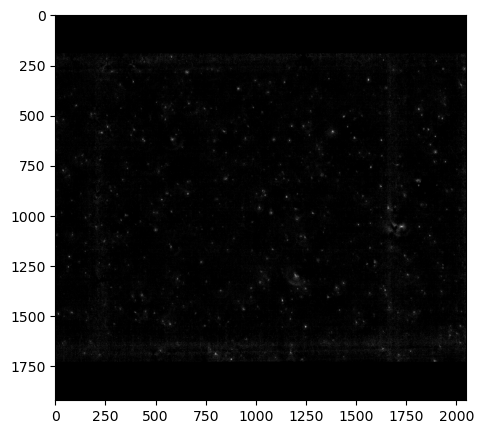

In [77]:
plt.imshow(frames[0])

Locate particles

Subplot

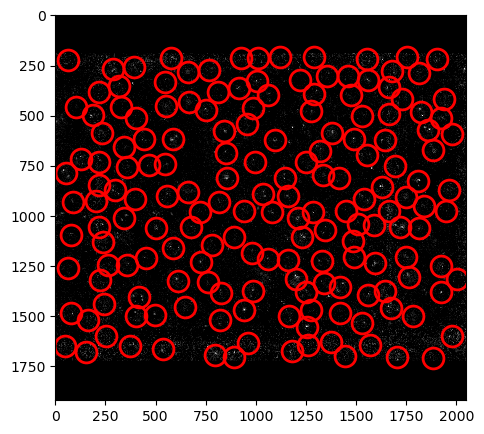

<Axes: >

In [78]:
f = tp.locate(frames[1], 81, minmass=1000) #where frames[1] is the image, 11 is the diameter of the particle, minmass is the minimum mass of the particle given by pixel intensity
tp.annotate(f, frames[1])

Locate features

In [79]:
tp.quiet(False)  # Turn off progress reports for now
f = tp.batch(frames[:100], 61, minmass=1000)

Frame 99: 296 features


Track particles from frame to frame

In [80]:
tp.quiet()  # Turn off progress reports for best performance
t = tp.link(f, 10, memory=3)  #where 10 is the maximum distance between two particles in consecutive frames, memory is the number of frames during which a particle can disappear and reappear again
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,209.084941,979.481716,9954.451494,18.739287,0.218153,28.945008,21867.0,0.0,0,0
177,1137.501888,153.098332,5574.984025,13.727645,0.073417,107.008819,11259.0,0.0,0,1
178,1138.306725,783.042087,5647.785106,13.303148,0.065437,71.046839,11805.0,0.0,0,2
179,1160.338243,2018.842953,5121.512228,17.704038,0.274642,48.241681,14203.0,0.0,0,3
180,1153.945317,575.599518,10554.402576,10.663850,0.377921,118.411398,17814.0,0.0,0,4


In [81]:
t1 = tp.filter_stubs(t, 17)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 10115
After: 143


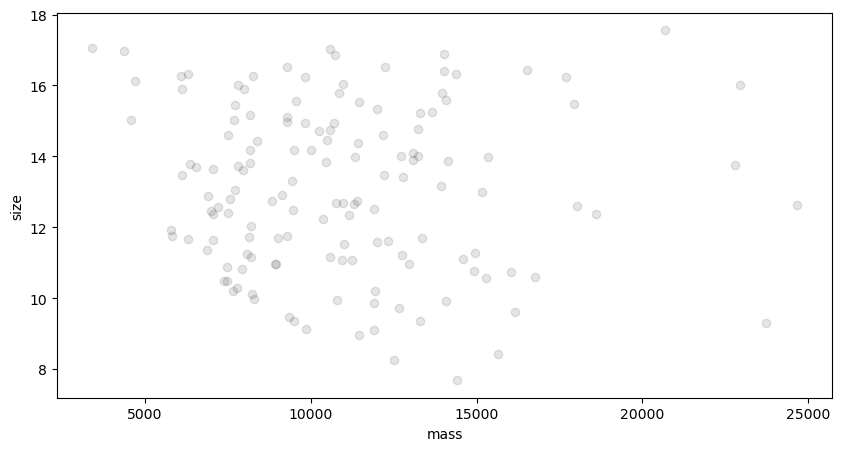

In [82]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); #plots size vs. mass

In [83]:
t2 = t1[((t1['mass'] > 20) & (t1['size'] <20) &
         (t1['ecc'] < 3))]

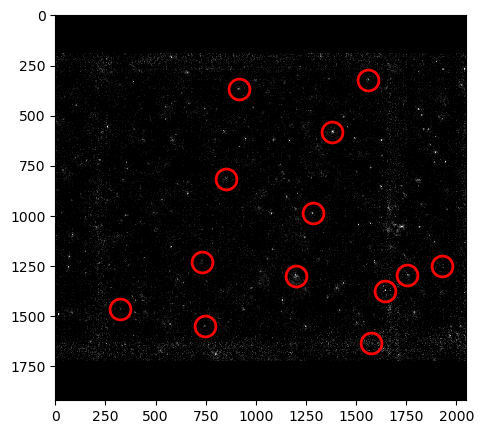

<Axes: >

In [84]:
plt.figure()
tp.annotate(t2[t2['frame'] == 0], frames[0])

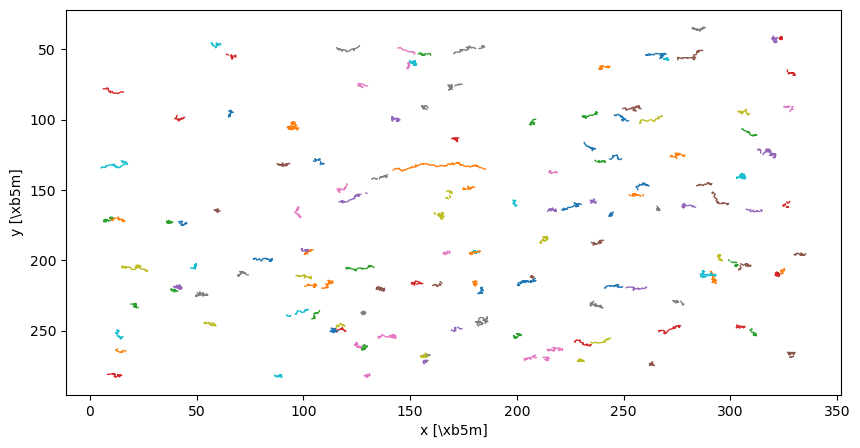

<Axes: xlabel='x [\\xb5m]', ylabel='y [\\xb5m]'>

In [85]:
plt.figure()
tp.plot_traj(t2, mpp= 0.167)

In [86]:
d = tp.compute_drift(t2)

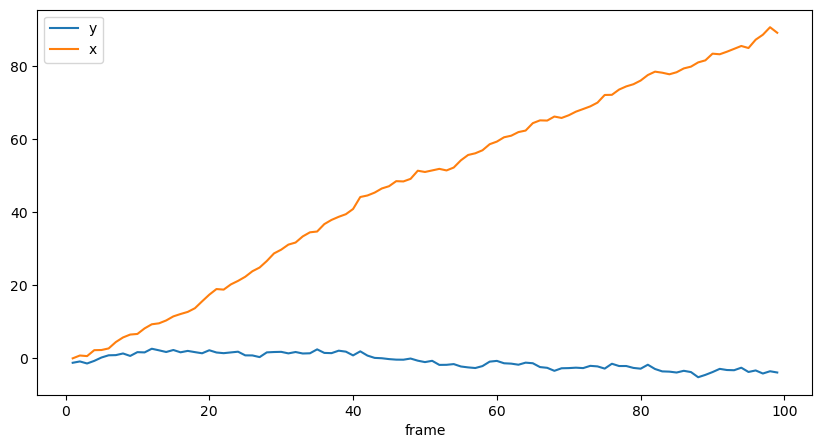

In [87]:
d.plot()
plt.show()

In [88]:
tm = tp.subtract_drift(t2.copy(), d)

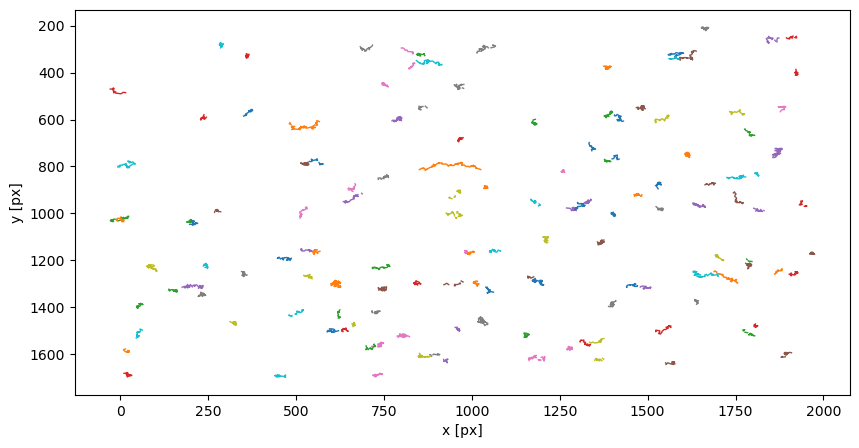

In [89]:
ax = tp.plot_traj(tm)
plt.show()

In [ ]:
#plot the trajectories on top of the first frame
plt.figure()
tp.plot_traj(t2, superimpose=frames[0], label=True)

In [91]:
em = tp.emsd(tm, 1/7, 5)
em.head()


lagt
0.2    0.535036
0.4    0.980400
0.6    1.397660
0.8    1.887102
1.0    2.384755
Name: msd, dtype: float64

[Text(0, 0.5, '$\\langle \\Delta r^2 \\rangle$ [$\\mu$m$^2$]'),
 Text(0.5, 0, 'lag time $t$')]

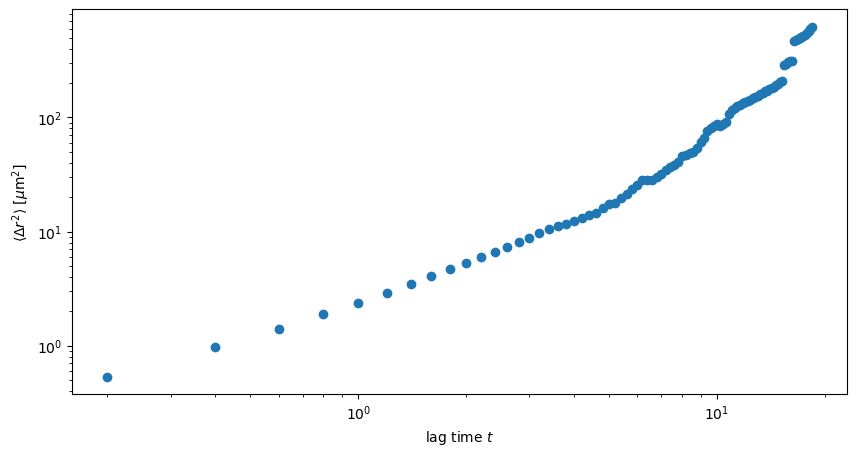

In [92]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')

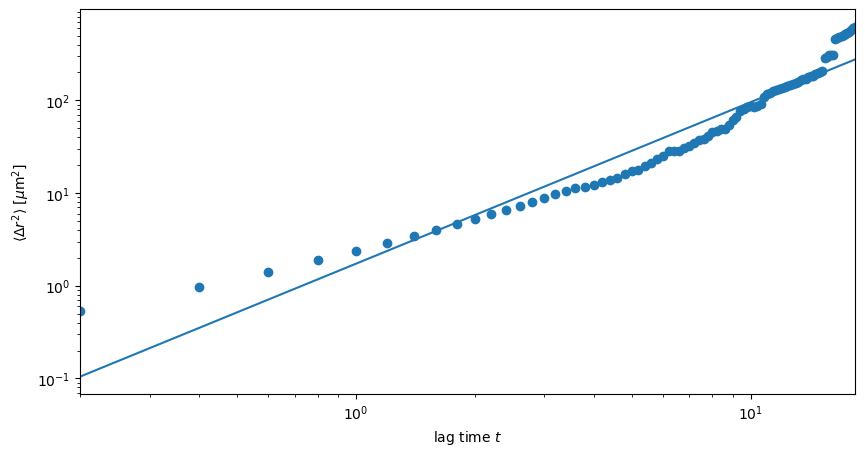

In [93]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
parameter = tp.utils.fit_powerlaw(em)  #performs linear best fit in log space, plots]

In [100]:
#Where A = 4D, and D is the diffusion coefficient.

D = parameter["A"]["msd"]/4
# calculate hydrodynamic radius from the diffusion coefficient
eta = 0.001000 # Pa s
T = 293.15 # K
kB = 1.38064852e-23 # m^2 kg s^-2 K^-1 boltzmann constant
#convert to m^2/s
R = kB*T/(6*np.pi*eta*D*1e-12)
#convert to um
R = R*10**6
print(f"Hydrodynamic radius 1B: {R}")
print(f"Diffusion coeffisient 1B: {D}")

Hydrodynamic radius 1B: 0.49688671691677994
Diffusion coeffisient 1B: 0.4321301019270518


In [106]:
#calculate mean and standard deviation of the diffusion coefficient from sample B
D_B = [0.4321301019270518, 0.5223560050842501, 0.6725158666305319]
mean_D_B = np.mean(D_B)
print(f"Mean value of the diffusion coeficcient {mean_D_B} um^2/s")

np.std(D_B) #standard deviation


Mean value of the diffusion coeficcient 0.5423339912139445 um^2/s


0.0991486053536741

In [107]:
R_A = [0.49688671691677994, 0.41106009223118695, 0.31927827770554196]
mean_R_A = np.mean(R_A)
print(mean_R_A)

np.std(R_A)

0.4090750289511696


0.07252192669316068

In [97]:
t1["size"][0] # size of the particles in the first frame

frame
0    10.317216
0    12.065733
0     8.874820
0    17.131674
0     8.995187
0    18.111386
0    11.267602
0    17.346944
0    15.367183
0     8.181278
0     8.192107
0    10.418989
0    11.310994
Name: size, dtype: float64